In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv as csv

# /Users/hayatoyamaguchi/Public/kaggle/House Price/house-prices-advanced-regression-techniques

path = "house-prices-advanced-regression-techniques/"
train_df = pd.read_csv(path+"train.csv", header=0)
test_df = pd.read_csv(path+"test.csv", header=0)
train_df['WhatIsData'] = 'Train'
test_df['WhatIsData'] = 'Test'
train_df.tail()

drop_train_df = train_df.drop('SalePrice',axis=1)
allData = pd.concat([drop_train_df,test_df],axis=0)
allData['TotalSF'] = allData['TotalBsmtSF'] + allData['1stFlrSF'] + allData['2ndFlrSF']
print(train_df.shape)
print(drop_train_df.shape)
print(test_df.shape)
print(allData.shape)
allData["LotFrontage"] = allData.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
na_col_list = allData.isnull().sum()[allData.isnull().sum()>0].sort_values(ascending=False).index.tolist()
for row in na_col_list:
    if allData[row].dtypes == "float64":
        allData[row][allData[row].isnull()] = 0
    else:
        allData[row][allData[row].isnull()] = "NA"

dropData = allData[allData.columns[allData.columns != "WhatIsData"]]

data_dummies = pd.get_dummies(dropData)
transdropData = pd.concat([dropData,data_dummies],axis=1)

transdropData = transdropData.select_dtypes(include=["float64","int64","uint8"])
transdropData = transdropData.astype('int')
a = transdropData.select_dtypes(include="object")
print(a.shape)
print(transdropData.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = transdropData.columns.values
transdropData_scaled = pd.DataFrame(scaler.fit(transdropData).transform(transdropData),columns=columns)
print(transdropData_scaled.shape)
print(allData["WhatIsData"].shape)
# transAllData = pd.concat([transdropData_scaled,allData["WhatIsData"]],axis=1)

transdropData_scaled["WhatIsData"] = list(allData["WhatIsData"])
transAllData = transdropData_scaled

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df["SalePrice"])
type(np.log(train_df["SalePrice"][0]))

transAllData2 = transAllData.loc[:,~transAllData.columns.duplicated()]
print(transAllData.shape)
print(transAllData2.shape)

X_train = transAllData2[transAllData2['WhatIsData']=='Train'].drop(['WhatIsData','Id'], axis=1)
y_train = np.log(train_df["SalePrice"])
X_test = transAllData2[transAllData2['WhatIsData']=='Test'].drop(['WhatIsData','Id'], axis=1)



(1460, 82)
(1460, 81)
(1459, 81)
(2919, 82)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(2919, 0)
(2919, 351)
(2919, 351)
(2919,)
(2919, 352)
(2919, 314)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

from pylab import rcParams

rcParams['figure.figsize'] = 20,200

ranking = np.argsort(-rf.feature_importances_)
# f, ax = plt.subplots(figsize=(11, 90))
# sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
# ax.set_xlabel("feature importance")
# plt.tight_layout()
# plt.show()

Training done using Random Forest


In [45]:
X_train = X_train.iloc[:,ranking[:37]]
X_test = X_test.iloc[:,ranking[:37]]
X_train["Interaction"] = X_train["TotalSF"]*X_train["OverallQual"]
X_test["Interaction"] = X_test["TotalSF"]*X_test["OverallQual"]

In [5]:
X_train.shape

(1460, 38)

In [6]:
# XGBoost, RandomForest,SVR
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgbr = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
xgbr.fit(X_train,y_train)

from sklearn.svm import SVR
svr = SVR(C=3,gamma=0.001)
svr.fit(X_train,y_train)

from sklearn.ensemble import RandomForestRlassifier
forest = RandomForestRegressor(random_state=0,min_samples_split=10,n_estimators=700)
forest.fit(X_train,y_train)
mlp = MLPRegressor(
    hidden_layer_sizes = (90, 90),
    alpha = 2.75q
)


##XGboosting,RandomForest,

SyntaxError: invalid syntax (<ipython-input-6-4ca19fadd47c>, line 8)

In [ ]:
from sklearn.svm import SVR
svr = SVR()
param_grid = {"C":[1,3,10,30,100,300,100],"gamma":[0,0.001,0.003,0.01]}
grid_search = GridSearchCV(svr, param_grid,scoring="neg_mean_squared_error")

grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# grid_search.cv_results_ = results
# result = pd.DataFrame(pd.concat([results["param_C"],results["param_gamma"],results["mean_test_score"]],axis=1))
# result
model = SVR(C=3,gamma=0.001)


from datetime import datetime
time= datetime.now().strftime("%Y%m%d-%H%M%S")

model.fit(X_train,y_train)
predictions = np.exp(model.predict(X_test))

df_result = pd.DataFrame()
df_result['Id'] = test_df['Id']
df_result['SalePrice'] = predictions
df_result.to_csv('result.csv'+time,index=False)
df_result

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
# epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model = RandomForestRegressor(random_state=0,min_samples_split=10,n_estimators=700)
    X_train_epoch = X_train_train[:epoch]
    y_train_epoch = y_train_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val,y_val))
#     train_scores.append(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#     test_scores.append(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))

    if epoch==1095:
#             print(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#             print(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))
            print(model.score(X_train_epoch,y_train_epoch))
            print(model.score(X_val,y_val))
    
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

In [ ]:
# XGBoost, RandomForest,SVR
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgbr = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
xgbr.fit(X_train,y_train)

from sklearn.svm import SVR
svr = SVR(C=3,gamma=0.001)
svr.fit(X_train,y_train)

# from sklearn.ensemble import RandomForestRegressor
# forest =RandomForestRegressor(random_state=0,min_samples_split=10,n_estimators=700)
# forest.fit(X_train,y_train)



##XGboosting,RandomForest,

In [ ]:
# X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train),
#      'DL': reg_dl.predict(X_train).ravel(),
#      'SVR': reg_svr.predict(X_train),
#     })
X_train2 = pd.DataFrame({"XGB":xgbr.predict(X_train),"SVR":svr.predict(X_train),"RandomForest":forest.predict(X_train),})
X_train2 

In [ ]:
from sklearn import linear_model
from datetime import datetime
from sklearn.model_selection import train_test_split
X_train2_train,X_val2,y_train2_train,y_val2 = train_test_split(X_train2,y_train,random_state=0)

time= datetime.now().strftime("%Y%m%d-%H%M%S")

reg = linear_model.LinearRegression()
reg.fit(X_train2_train,y_train2_train)
# reg.score()
print(y_train2_train.shape)
print(X_train2_train.shape)
print(np.sqrt(mean_squared_error(y_train2_train ,reg.predict(X_train2_train))))
print(np.sqrt(mean_squared_error(y_val2,reg.predict(X_val2))))

# print(reg.coef_)

# X_test2 = pd.DataFrame({"XGB":xgbr.predict(X_test),"SVR":svr.predict(X_test),"RandomForest":forest.predict(X_test),})

# predictions = np.exp(reg.predict(X_test2))

# df_result = pd.DataFrame()
# df_result['Id'] = test_df['Id']
# df_result['SalePrice'] = predictions
# df_result.to_csv('result.csv'+time,index=False)
# df_result.head()

In [7]:


from datetime import datetime
time= datetime.now().strftime("%Y%m%d-%H%M%S")
model = RandomForestRegressor(random_state=0,min_samples_split=10,n_estimators=700)
model.fit(X_train,y_train)
predictions = np.exp(model.predict(X_test))

df_result = pd.DataFrame()
df_result['Id'] = test_df['Id']
df_result['SalePrice'] = predictions
df_result.to_csv('result.csv'+time,index=False)
df_result

,Id,SalePrice
0,1461,128211.099070
1,1462,157288.336237
2,1463,180487.799804
3,1464,181641.975367
4,1465,189983.817002
5,1466,183866.440962
6,1467,172530.086674
7,1468,175361.022270
8,1469,187383.777570
9,1470,115358.722149


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train2_train,X_val,y_train2_train,y_val = train_test_split(X_train2,y_train,random_state=0)
# epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model =reg = linear_model.LinearRegression()
    X_train_epoch = X_train2_train[:epoch]
    y_train_epoch = y_train2_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val,y_val))
#     train_scores.append(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#     test_scores.append(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))

    if epoch==1095:
#             print(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#             print(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))
            print(model.score(X_train_epoch,y_train_epoch))
            print(model.score(X_val,y_val))
    
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

NameError: name 'X_train2' is not defined

In [9]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train_train, y_train_train)
lgb_eval = lgb.Dataset(X_val,y_val)
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'num_class': 3,
        'learning_rate': 0.1,
        'num_leaves': 23,
        'min_data_in_leaf': 1,
        'num_iteration': 100,
        'verbose': 0
}

# train
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=50,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)

NameError: name 'X_train_train' is not defined

In [14]:
from sklearn.model_selection import train_test_split
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes = (120, 90),
    alpha = 2.75
)
mlp.fit(X_train_train,y_train_train)
print(mlp.score(X_train_train,y_train_train))
print(mlp.score(X_val,y_val))
from sklearn.metrics import mean_squared_error
# print(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
# print(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))

0.8097331431075494
-1.346399827607737


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9019721646963677
0.808373200943964


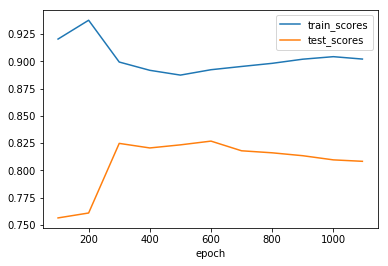

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train,random_state=0)
epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
# epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model = Ridge(alpha=100)
    X_train_epoch = X_train_train[:epoch]
    y_train_epoch = y_train_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val,y_val))
#     train_scores.append(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#     test_scores.append(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))

    if epoch==1095:
#             print(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#             print(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))
            print(model.score(X_train_epoch,y_train_epoch))
            print(model.score(X_val,y_val))
    
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

In [22]:
from sklearn import linear_model
from datetime import datetime
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train,random_state=0)

time= datetime.now().strftime("%Y%m%d-%H%M%S")

reg = linear_model.LinearRegression()
reg.fit(X_train_train,y_train_train)
# reg.score()
print(y_train_train.shape)
print(X_train_train.shape)
print(np.sqrt(mean_squared_error(y_train_train ,reg.predict(X_train_train))))
print(np.sqrt(mean_squared_error(y_val,reg.predict(X_val))))


xgbr = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
xgbr.fit(X_train_train,y_train_train)

from sklearn.svm import SVR
svr = SVR(C=3,gamma=0.001)
svr.fit(X_train_train,y_train_train)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=0,min_samples_split=10,n_estimators=700)
forest.fit(X_train_train,y_train_train)

(1095,)
(1095, 38)
0.14077324295235968
0.19434828022649228


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

0.0008087338368757413
0.01112257796109073
[ 0.13133503 -0.1753609   0.05303806]


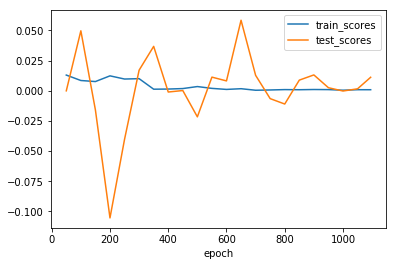

In [27]:
X_train2 = pd.DataFrame({"XGB":xgbr.predict(X_train_train),"SVR":svr.predict(X_train_train),"RandomForest":forest.predict(X_train_train),})
X_val2 = pd.DataFrame({"XGB":xgbr.predict(X_val),"SVR":svr.predict(X_val),"RandomForest":forest.predict(X_val),})
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# X_train2_train,X_val,y_train2_train,y_val = train_test_split(X_train2,y_train,random_state=0)
# epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model =reg = linear_model.LinearRegression()
    X_train_epoch = X_train2[:epoch]
    y_train_epoch = y_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val2,y_val))
#     train_scores.append(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#     test_scores.append(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))

    if epoch==1095:
#             print(np.sqrt(mean_squared_error(y_train_train ,model.predict(X_train_train))))
#             print(np.sqrt(mean_squared_error(y_val,model.predict(X_val))))
            print(model.score(X_train_epoch,y_train_epoch))
            print(model.score(X_val2,y_val))

print(model.coef_)
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

In [28]:
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRlassifier

xgbr = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
xgbr.fit(X_train,y_train)


svr = SVR(C=3,gamma=0.001)
svr.fit(X_train,y_train)

forest = RandomForestRegressor(random_state=0,min_samples_split=10,n_estimators=700)
forest.fit(X_train,y_train)

In [42]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

clf = StackingRegressor(regressor=[xgbr,svr,forest], 
                          use_probas=True,
                          average_probas=False,
                          meta_regressor=lr)
clf.fit(X_train_train,y_tain_train)
clf.score(X_train_train,y_tain_train)
clf.score(X_val,y_val)

TypeError: __init__() got an unexpected keyword argument 'regressor'

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train,random_state=0)
lr = LinearRegression()
lr.fit(X_train_train,y_train_train)
print(lr.score(X_train_train,y_train_train))
print(lr.score(X_val,y_val))
# params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
# rdg_reg = Ridge()
# clf = GridSearchCV(rdg_reg,params,cv=2,verbose = 1, scoring = 'neg_mean_squared_error')
# clf.fit(X_train,y_train)

# print(clf.best_params_)
# #{'alpha': 4}

# pd.DataFrame(clf.cv_results_)

0.9037624654961689
0.8093023073464667


In [49]:
from sklearn.linear_model import Ridge
param_grid = {"alpha":[0,.01,0.03,0.1,0.3,1,3,10,30,100]}


# "min_child_weigh":[1,2,4,7,10]
# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]
# "max_depth":[3,4,5],"learning_rate":[0.03,0.1,0.3]
# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid)
# , scoring = "neg_mean_squared_error"
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

results = pd.DataFrame(grid_search.cv_results_)
results

0.8702121149064014
{'alpha': 30}


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003283,0.000772,0.000829,0.000058,0,{'alpha': 0},0.889264,0.870083,0.841777,0.867059,0.019501,10,0.882546,0.893587,0.897254,0.891129,0.006251
1,0.002228,0.000087,0.000802,0.000118,0.01,{'alpha': 0.01},0.891099,0.872861,0.843596,0.869203,0.019562,9,0.883661,0.895519,0.897516,0.892232,0.006115
2,0.002469,0.000784,0.000975,0.000184,0.03,{'alpha': 0.03},0.891105,0.872865,0.843597,0.869206,0.019564,8,0.883661,0.895519,0.897516,0.892232,0.006115
3,0.003112,0.000928,0.001464,0.000320,0.1,{'alpha': 0.1},0.891123,0.872877,0.843601,0.869218,0.019569,7,0.883661,0.895519,0.897515,0.892232,0.006115
4,0.001624,0.000017,0.000725,0.000173,0.3,{'alpha': 0.3},0.891170,0.872912,0.843611,0.869249,0.019585,6,0.883661,0.895518,0.897514,0.892231,0.006114
5,0.001845,0.000342,0.000845,0.000330,1,{'alpha': 1},0.891306,0.873018,0.843636,0.869338,0.019631,5,0.883660,0.895507,0.897504,0.892224,0.006110
6,0.001498,0.000085,0.000566,0.000009,3,{'alpha': 3},0.891562,0.873247,0.843665,0.869509,0.019729,4,0.883654,0.895459,0.897458,0.892190,0.006091
7,0.001530,0.000009,0.000608,0.000058,10,{'alpha': 10},0.892066,0.873733,0.843648,0.869833,0.019955,2,0.883612,0.895294,0.897319,0.892075,0.006041
8,0.001417,0.000026,0.000561,0.000002,30,{'alpha': 30},0.892887,0.874333,0.843361,0.870212,0.020424,1,0.883350,0.894855,0.897015,0.891740,0.005998
9,0.001677,0.000152,0.000581,0.000011,100,{'alpha': 100},0.893970,0.873828,0.841287,0.869714,0.021700,3,0.881522,0.892796,0.895559,0.889959,0.006072
